# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек
Выполнил студент гр. 9304 Кузнецов Роман, вариант 32.

# Цель работы 
Формирование представленя о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.



## Основные теоретические положения

Существует несколько методов быстрого возведения в степень - методов, предназначенных для возведения числа $x$ в натуральную степень $n$ за меньшее число умножений, чем это требуется в определении степени. В данной работе будут рассмотрны 2 из них: бинарный метод и метод множителей.

**Бинарный метод:**

Показатель степени представляется в двоичном виде; отбрасывается больший разряд. Если в разряде стоит 1, то текущий результат удваивается и умножается на х. Если в разряде стоит 0, то текущий результат просто удваивается.  
Количество операций можно вычислить по формуле: $\nu(n) + \lambda(n) - 1$, где $\nu(n)$ - вес Хэмминга - количество не нулевых цифр в двоичной записи числа $n$, $\lambda(n) = \left\lfloor lbn \right\rfloor$.

**Метод множителей:**

Показатель степени представляется как произведение двух чисел $n = i\cdot j$, где $i$ - наименьший простой множитель числа n, а $j > 1$. Сначала число возводится в степень $i$, затем результат возводится в степень $j$. Если показатель степени $n$ простое число, то на множители $i$ и $j$ раскладывается число $n-1$, почле чего число возводится в эту степень, а затем домножается само на себя.

*Аддитивная цепочка для числа $n \in \mathbb{N}$* $-$ это последовательность натуральных чисел $(1=a_0, a_1, ... , a_m=n)$, начинающаяся с единицы, в которой каждый последующий элемент является суммой каких-то двух предшествующих элементов:
- $a_{0}=1$;
- для любого $0 < i \leq m$, $a_{i}=a_{j}+a_{k}$, где $k \leq j < i$.

$l(n)$ - минимальная длина аддитивной цепочки. Если $n \leq 1000$, то справедлива рекурентная формула: $l(n) = min\{ l(n-1)+1, l_n\} - \delta_n$, где $l_p = \begin{cases} \infty \text{, если p - простое число}  \\ l(q) + l(\frac{p}{q}) \text{, если q - минимальный простой делитель числа p} \end{cases}$, $\delta_n\in\{0, 1\}$

Если $a_i < a_{i+1}$, то равенство $a_i = a_j+a_k$, $i = 1..m$, $0\leqslant k\leqslant j < i$ называется шагом аддитивной цепочки. Типы шагов:
- Удвоение, если $j = k = i-1$: $a_i = 2 * a_{i-1}$
- Звёздный, если $j = i-1$, $k \in [0,i-1]$
- Малый шаг, если $\lambda(a_i) = \lambda(a_{i-1})$

*Звёздная цепочка* $-$ это цепочка, которая содержит в себе только звёздные шаги. $a_i = a_{i-1} + a_k\text{, где } 0\leqslant k\leqslant i-1 $. $l^*(n)$ - длина звёздной цепочки. $l^*(n)\geqslant l(n)$

**Теорема Брауэра:**

При некотором $k < log_2 log_2 n => l(n)<(1+k^{-1}) \cdot \lceil log_2 n \rceil + 2^{k-1}-k+2$

Если $k=\lambda(\lambda(n))-2\lambda(\lambda(\lambda(n)))$, то получим:

1: $\lim \limits_{n \to \infty} \frac{l(n)}{\lambda(n)}=1$

2: Наилучшая верхняя оценка для длины аддитивной цепочки: $\lambda(n)(1+\frac{1}{\lambda(\lambda(n))}+\frac{o(\lambda(\lambda(\lambda(n))))}{\lambda(\lambda(n))^2})$

**Приближенный алгоритм Яо для вычисления аддитивной цепочки:**

Алгоритм Яо вычисляет аддитивную цепочку для числа $n$ без гарантии минимальности этой цепочки.

$ n,k \geq 2$, тогда $n$ можно представить следующим образом: $\displaystyle\sum_{i=0} a_i \cdot 2^{ik}$

Введём функцию $d(z)$ - сумма чисел $2^{ik}\,\forall i: a_i=z$

Аддитивная цепочка Яо начинается со степеней двойки: $Y_k(n):\{1,2,4,\dots , 2^{\lambda(n)}\}$, 
после вычисляются все $d(z)$, где $z \in \{1, 2, 3, \dots, 2^{k-1} \}$, такие что $d(z) \neq 0$. А $n=\displaystyle\sum_{z=1}^{2^{k-1}} zd(z)$

**Гипотеза Шольца-Брауэра:**
$$ l^*(2^n-1)\leqslant l^*(n)+n-1 $$

Пусть ${\{a_i\}}_{i=1}^m \text{ - звёздная цепочка, } l^*(n) = m, a_1 = 1$, тогда можно задать *вектор индексов* ${\{r_i\}}_{i=1}^{m-1}\text{: } r_i = \{x: 1\leqslant x\leqslant i\}$.  
Шаг звёздной цепочки можно переписать с помощью вектора индексов: $a_i = a_{i-1} + a_{r_{i-1}}\text{, где }2\leqslant i\leqslant m$.

*Полная упорядоченность векторов:*  
Будем считать, что $r = {\{r_i\}}_{i=1}^{m-1}$, больше чем $\tilde r = {\{\tilde r_i\}}_{i=1}^{m-1}$, если $r_1 = \tilde r_1$, $r_2 = \tilde r_2$, $r_3 = \tilde r_3$, $r_{i-1} = \tilde r_{i-1}$, ..., $r_i > \tilde r_i$.

Вектор индексов можно разбить на два вектора: $r = {\{r_i\}}_{i=1}^{q}$ - фиксированный вектор, $\rho = {\{\rho_j\}}_{j=q+1}^{m-1}$ меняющийся вектор. Можно заметить, что:
- наибольшее значение $a_m$ достигается при векторе индексов ${\{r_i\}}_{i=1}^{q} \cup \{q+1, q+2, ..., m-1\}, \ a_{max} = a_{q+1}\cdot2^{m-q}$;
- наименьшее значение $a_m$ достигается при векторе индексов ${\{r_i\}}_{i=1}^{q} \cup \{1, 1, ..., 1\}, \ a_{min} = a_{q+1}+m-q$.

На разбиение вектора индексов строится следующий алгоритм поиска минимальной звездной цепочки для заданного числа $n$.

**Алгоритм дробления вектора индексов:**

1. Векток индексов разбивается на фиксированный и меняющийся. 
2. Строится звездная цепочка для всего вектора индексов и вычисляется $a_{min}\text{ и }a_{max}$. Если:
    - $a_m = n$, то решение найдено;
    - $n\notin[a_{min}, a_{max}]$, то осуществляется переход к следующему набору фиксированному вектору;
    - $n\in[a_{min}, a_{max}]$, то перебор всех меняющихся векторов.
3. Если для заданной длины не нашлось аддитивной цепочки, то длина цепочки увеличивается (длина аддитивной цепочки $m\in[ \underline{l}(n),\overline{l}(n)],\text{ где } \underline{l}(n)=\lceil log_2 n \rceil, \overline{l}(n)=\lambda(n)+\nu(n)-1$).

# Постановка задачи
Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием систем компьютерной алгебры SageMath, провести анализ алгоритмнов. Полученные результаты содержательно проинтерпретировать.
# Порядок выполнения работы

1. Применить бинарный метод и метод множителей для $x^n$, где n⩾30, для 2-3 значений n (значения n выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.
2. Реализовать алгоритм Брауэра (для нечётных вариантов) или алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра k, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.
3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при n>500. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.
4. Проверить следствие 1 теоремы Брауэра для n=1..200 путём построения функции l(n) и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.
5. Проверить гипотезу Шольца–Брауэра для 1<n⩽10 на алгоритме дробления вектора индексов. Сделать выводы.
6. *Дополнительное необязательное задание: найти и/или предложить модификации алгоритмов и привести описание модификаций. Реализовать модифицированные алгоритмы и сравнить их мощность*

# Выполнение работы
**1. Бинарный метод, метод множителей**
Применим бинарный метод множителей для $x^{32}$, $x^{31}$, $x^{95}$

Для $x^{32}$, бинарный метод:  
Число в бинарном виде: $32_{10}$=$100000_2$, если отбросить первую единицу, то оптимальным методом возведения в степень будет следование по этому числу и умножение на себя, если текущая цифра 0, и умножение на себя с домножением на $x$

$x*x=x^2$  
$x^2*x^2=x^4$  
$x^4*x^4=x^8$  
$x^8*x^8=x^{16}$  
$x^{16}*x^{16}=x^{32}$  

Для $x^{31}$, бинарный метод:  
Число в бинарном виде: $31_{10}$=$11111_2$;

$x*x*x=x^3$  
$x^3*x^3*x=x^7$  
$x^7*x^7*x=x^{15}$  
$x^{15}*x^{15}*x=x^{31}$  

Для $x^{95}$, бинарный метод:  
Число в бинарном виде: $95_{10}$=$1011111_2$;

$x*x=x^2$  
$x^2*x^2*x=x^5$  
$x^5*x^5*x=x^{11}$  
$x^{11}*x^{11}*x=x^{23}$  
$x^{23}*x^{23}*x=x^{47}$  
$x^{47}*x^{47}*x=x^{95}$

Для $x^{32}$, метод множителей:  
Разбиваем показатель степени до простых множителей  
$32$ = $2*16$, наименьший простой множитель - 2.

$x*x=x^2=z$  
$z*z=z^2$  
$z^2*z^2=z^4$  
$z^4*z^4=z^8$  
$z^8*z^8=z^{16}=x^{32}$

Для $x^{31}$, метод множителей:
31 - число простое, для 30 - множители 3 и 10.

$x*x=x^2$  
$x^2*x=x^3=z$  
$z*z=z^2$  
$z^2*z^2=z^4$  
$z^4*z^4=z^8$  
$z^8*z^2=z^{10}=x^{30}$  
$z^{10}*x=x^{31}$

Для $x^{95}$, метод множителей:
$95=5*19$

$x*x=x^2$
$x^2*x^2=x^4$  
$x^4*x=x^5=z$  
$z*z=z^2$  
$z^2*z^2=z^4$  
$z^4*z^4=z^8$  
$z^8*z^8=z^{16}$  
$z^{16}*z^2=z^{18}$  
$z^{18}*z=z^{19}=x^{95}$  

**Результаты возведения в степень методами БМ и ММ:**

|$n$|Количество операций БМ|Количество операций ММ|
|:-:|:-:|:-:|
|32|5|5|
|31|8|7|
|95|11|9|

**Вывод:**

При больших значениях $n$, а также при значениях $2^{k}-1$, где k - целое, метод множитлей оказывается эффективнее, в остальных случаях разница либо мала, либо отсутствует.

# Алгоритм Яо
Релазован алгоритм Яо для вычисления приближенной аддитивной цепочки:

In [322]:
def binMethod(base, pow):
    powBin = format(pow, 'b')[1:]
    chain = [base]
    cur = base
    for bit in powBin:
        cur *= 2
        chain.append(cur)
        if bit == '1':
            cur += base
            chain.append(cur)
    return chain

n = int(input("N: "))
k = int(input("K: "))
chain = list()
twoPows = 1
while twoPows < n:
    chain.append(twoPows)
    twoPows *= 2
mults = list()
inds = list()
div = 2**k
ind = 0
while n > 0:
    if n % div != 0:
        mults.append(n % div)
        inds.append(ind)
    ind += k
    n = n // div
mults.reverse()
inds.reverse()
powSum = 0
while mults:
    minMult = min(mults)
    dMinMult = 0
    dMinMults = list()
    for i in range(len(mults)):
        if mults[i] == minMult:
            dMinMult += chain[inds[i]]
            dMinMults.append(dMinMult)
    for i in range(len(mults)-1, -1, -1):
        if mults[i] == minMult:
            mults.pop(i)
            inds.pop(i)
    for elem in dMinMults:
        if elem not in chain:
            chain.append(elem)
    binChain = binMethod(dMinMult, minMult)
    for elem in binChain:
        if elem not in chain:
            chain.append(elem)
    powSum += binChain[-1]
    if powSum not in chain:
        chain.append(powSum)
print(f"Цепочка (L={len(chain)}): {chain}")

N: 83
K: 2
Цепочка (L=10): [1, 2, 4, 8, 16, 32, 64, 80, 3, 83]


Алгоритм был применен к числам 19, 43, 79

Далее представлена таблица с минимальными аддитивными цепочками для этих чисел:

|$n$|Минимальная длина|$k$|Аддитивная цепочка|
|:-:|:-:|:-:|:-:|
|19|7|2|[1, 2, 4, 8, 16, 3, 19]|
|43|9|3|[1, 2, 4, 8, 16, 32, 3, 40, 43]|
|79|11|2|[1, 2, 4, 8, 16, 32, 64, 5, 10, 15, 79]|

Зависимость длины аддитивной цепочки от $k$ при $n=19$:

|$k$|Длина|Аддитивная цепочка|
|:-:|:-:|:-:|
|2|7|[1, 2, 4, 8, 16, 3, 19]|
|3|7|[1, 2, 4, 8, 16, 3, 19]|
|4|7|[1, 2, 4, 8, 16, 3, 19]|
|5|8|[1, 2, 4, 8, 16, 9, 18, 19]|

Зависимость длины аддитивной цепочки от $k$ при $n=43$:

|$k$|Длина|Аддитивная цепочка|
|:-:|:-:|:-:|
|2|10|[1, 2, 4, 8, 16, 32, 20, 40, 3, 43]|
|3|9|[1, 2, 4, 8, 16, 32, 3, 40, 43]|
|4|10|[1, 2, 4, 8, 16, 32, 5, 10, 11, 43]|
|5|10|[1, 2, 4, 8, 16, 32, 5, 10, 11, 43]|

Зависимость длины аддитивной цепочки от $k$ при $n=79$:

|$k$|Длина|Аддитивная цепочка|
|:-:|:-:|:-:|
|2|11|[1, 2, 4, 8, 16, 32, 64, 5, 10, 15, 79]|
|3|12|[1, 2, 4, 8, 16, 32, 64, 72, 3, 6, 7, 79]|
|4|13|[1, 2, 4, 8, 16, 32, 64, 3, 6, 7, 14, 15, 79]|
|5|13|[1, 2, 4, 8, 16, 32, 64, 3, 6, 7, 14, 15, 79]|

**Вывод**

При увеличении $k$, начиная с некоторого момента, длина аддитивной цепочки только увеличивается, это значение $k$ скорее всего либо равно 2-3, либо близко к нему, по крайней мере, для не очень больших чисел (<100), однако до применения алгоритма установить $k$, при котором длина аддитивной цепочки минимальна, в зависимости от $n$ не удается.

# Алгоритм дробления вектора индексов
Данный алгоритм находит точную минимальную звездную цепочку

In [13]:
from math import log2 as lb
from time import time as curTime

def listToChain(fList, sList):
    chain = [1]
    for ind in fList:
        chain.append(chain[-1] + chain[ind - 1])
    for ind in sList:
        chain.append(chain[-1] + chain[ind - 1])
    return chain

def modVector(iVector, Sind, isFix):
    Lind = Sind + len(iVector) - 1
    for i in range(1, len(iVector) + 1):
        iVector[-i] -= 1
        if iVector[-i] == 0:
            if i == len(iVector):
                if (isFix):
                    iVector.pop()
                    for j in range(len(iVector)):
                        iVector[j] = j + Sind
                break
            iVector[-i] = Lind
            Lind -= 1
        else:
            break

def VISplit(n):
    bFrom = int(lb(n)) - 1 if format(n, 'b').count('1') == 1 else int(lb(n))
    bTo = int(lb(n)) + format(n, 'b').count('1') - 1
    for cur in range(bFrom, bFrom + bTo + 1):
        qV = 1 if cur <= 2 else cur // 2
        fixes = list()
        for i in range(1, qV + 1):
            fixes.append(i)
        while len(fixes) == qV:
            changes = list()
            for i in range(qV + 1, cur + 1):
                changes.append(i)
            chain = listToChain(fixes, changes)
            minV = chain[qV] + cur - qV
            maxV = chain[qV] * (2 ** (cur - qV))
            if chain[-1] == n:
                return chain
            if minV <= n and n <= maxV:
                if n == minV:
                    changes = list()
                    for indj in range(cur - qV):
                        changes.append(1)
                    return listToChain(fixes, changes)
                if n == maxV:
                    return listToChain(fixes, changes)
                while changes[0] != 0:
                    chain = listToChain(fixes, changes)
                    if chain[-1] == n:
                        return chain
                    modVector(changes, qV + 1, False)
            modVector(fixes, 1, True)

n = int(input("N: "))
Stime = curTime()
chain = VISplit(n)
Etime = curTime()
print(f"Цепочка (L={len(chain)}): {chain}")
if Etime - Stime < 1:
    print("Время подсчета: меньше секунды")
else:
    print(f"Время подсчета: {round(Etime - Stime)} секунд(-ы)")

N: 501
Цепочка (L=13): [1, 2, 4, 8, 16, 32, 64, 96, 100, 200, 400, 500, 501]
Время подсчета: 346.0 секунд(-ы)


Результаты и время работы алгоритма для $n=511$, $n=512$, $n=513$:

|$n$|Длина|Цепочка|Время подсчета (с)|
|:-:|:-:|:-:|:-:|
|501|13|[1, 2, 4, 8, 16, 32, 64, 96, 100, 200, 400, 500, 501]|102|
|511|13|[1, 2, 4, 8, 16, 32, 64, 72, 73, 146, 292, 438, 511]|103|
|512|10|[1, 2, 4, 8, 16, 32, 64, 128, 256, 512]|<1|
|513|11|[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 513]|<1|
|789|14|[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 768, 784, 788, 789]|1127|

*Cравнение длин цепочек, полученных разными алгоритмами:*

|$n$|Бин. метод|Метод множителей|Алгоритм Яо|Алгоритм дробления вектора|
|:-:|:-:|:-:|:-:|:-:|
|501|14|14|15|13|
|511|16|13|15|13|
|512|10|10|10|10|
|513|11|13|11|11|
|789|14|14|14|14|

**Вывод**

Сравнивая бинарный метод, метод множителей, алгоритм Яо и алгоритм дробления вектора, можно прийти к выводу, что самым точным оказался алгоритм дробления вектора индексов, однако он занимает слишком много времени (20 минут для $n=789$). Алгоритм Яо не сильно уступает в точности, однако неудобен, так как оптимальное значение $k$ неизвестно. Среди бинарного метода и метода множителей лучше себя показал метод множителей при $n=2^k-1$, в остальных случаях они примерно равны, учитывая, что бинарный метод проще, несколько быстрее, и не требует дополнительной памяти.

# Проверка следствия 1 теоремы Брауэра

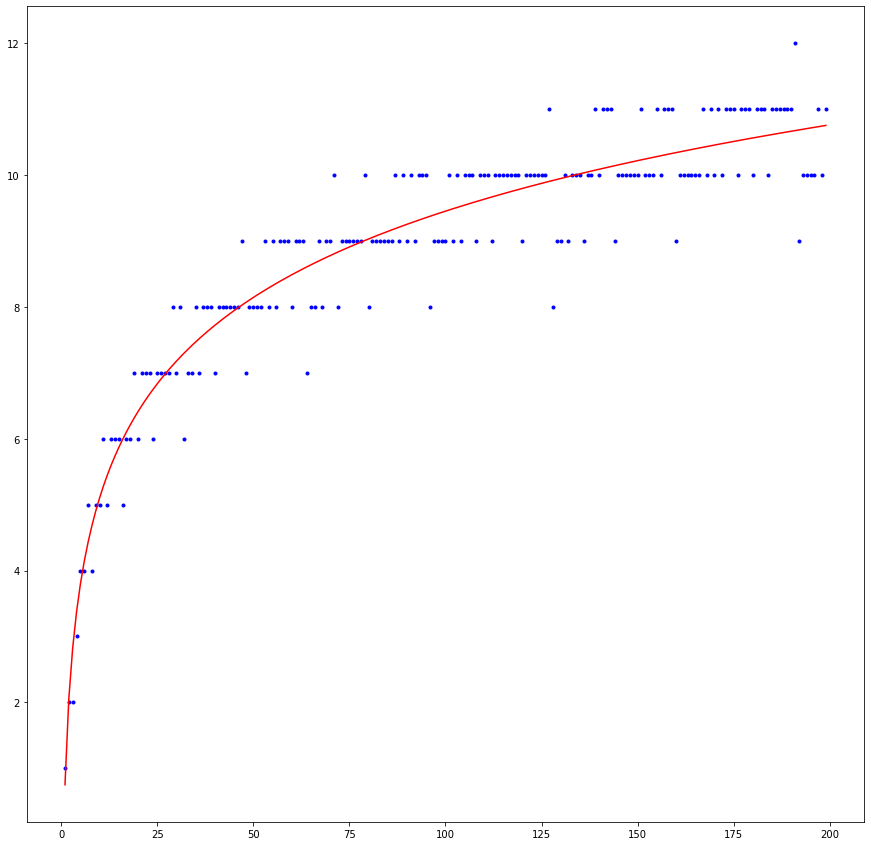

In [35]:
import pylab as plt

def getData(dataSize):
    n = [1]
    chainLen = [1]
    for i in range(2, dataSize):
        n.append(i)
        chainLen.append(len(VISplit(i)))
    return n, chainLen

def drawCurve(x, y):
    vec = vector([sum([float(y[i] * log(x[i])) for i in range(len(x))]), sum(y)])
    m = matrix([[sum([float((log(i))**2) for i in x]), sum([float(log(i)) for i in x])], [sum([float(log(i)) for i in x]), len(x)]])
    solution = m.solve_right(vec)
    plt.plot(x, [solution[0] * log(i) + solution[1] for i in x], color='r')

plt.figure(figsize=(15,15))
n, chainLen = getData(200)
plt.scatter(n, chainLen, color='b', marker='.')
drawCurve(n, chainLen)


**Вывод**

Из графика видно, что функция $l(n)$ апроксимируется логарифмической кривой, что согласуется со следствием теоремы Брауэра $\lim\limits_{x\to\infty} \cfrac{l(n)}{\lambda(n)} = 1$, то есть, эквивалентны при стремлении к бесконечности, а значит, скорость роста длины минимальной аддитивной цепочки совпадает со скоростью роста логарифмической функции.

# Проверка гипотезы Шольца-Брауэра

Проверим гипотезу Шольца-Брауэра для $1<n<=10$ на алгоритме дробления вектора индексов:

In [ ]:
for i in range(2, 11):
    a = len(VISplit((2**i) -  1))
    b = len(VISplit(i)) + i - 1
    print(f"n={i}; ({a} <= {b}) : {a<=b}")

n=2; (3 <= 3) : True
n=3; (5 <= 5) : True
n=4; (6 <= 6) : True
n=5; (8 <= 8) : True
n=6; (9 <= 9) : True
n=7; (11 <= 11) : True
n=8; (11 <= 11) : True
n=9; (13 <= 13) : True


**Вывод**
Из полученных данных следует, что гипотеза Шольца-Брауэра справедлива для $1<n<=10$.

# Выводы

В ходе выполнения практической работы:

1. Были улучшены навыки применения математического пакета SageMath, языка программирования Python
2. Сформировано представление о аддитивных цепочках, применены алгоритмы бинарный метод и метод множителей для вычисления приближенных аддитивных цепочек
3. Был реализован алгоритм Яо для вычисления приближенных аддитивных цепочек
4. Был реализован алгоритм дробления вектора индексов для нахождения минимальной цепочки.
5. Были проверены следствие первой теоремы Брауэра для $n=1..200$, гипотеза Шольца-Брауэра для $1<n<=10$ на алгоритме дробления вектора индексов.

Также были сравнены методы получения аддитивных цепочек. Из полученных данных стало ясно, что с некоторого момента при увеличении $k$ в алгоритме Яо длина аддитивной цепочки увеличивается, причем это значение $k$ не имеет прямой зависимости от $n$, алгоритм дробления вектора индексов занимает слишком много времени, несмотря на то, что позволяет получить аддитивную цепочку минимальной длины, а эффективность бинарного метода и метода множителей зависит от расположения $n$ относительно степеней двойки на числовой прямой.